In [298]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [299]:
data = pd.read_csv(r"E:\PYTHON\Exploratory Data Analysis Projects\Brazil Forest Fires\Dataset\Fire Forest in Brazil.csv", encoding='iso-8859-1',parse_dates=['date'])

In [300]:
data.dtypes

year               int64
state             object
month             object
number           float64
date      datetime64[ns]
dtype: object

#### Display `Top5` Rows

In [301]:
data.head(5)

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


#### Display `Last5` Rows

In [302]:
data.tail(5)

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


#### Find `Shape` Of Our Dataset

In [303]:
data.shape

(6454, 5)

In [304]:
print("No.of Rows:", data.shape[0])
print("No.of Column:", data.shape[1])

No.of Rows: 6454
No.of Column: 5


#### Getting `Overall` `Informations`

In [305]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    6454 non-null   int64         
 1   state   6454 non-null   object        
 2   month   6454 non-null   object        
 3   number  6454 non-null   float64       
 4   date    6454 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 252.2+ KB


#### Check For `Duplicate` Data and Drop Them

In [306]:
dup_data = data.duplicated().any()
print("Any Duplicate Values In This Dataset?", dup_data)

Any Duplicate Values In This Dataset? True


In [307]:
data = data.drop_duplicates()

In [308]:
dup_data = data.duplicated().any()
print("Any Duplicate Values In This Dataset?", dup_data)

Any Duplicate Values In This Dataset? False


In [309]:
 6454- 6422

32

#### Check For `Null` Values

In [310]:
data.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

#### Get Overall `Statistics`

In [311]:
data.describe(include='all')

,year,state,month,number,date
count,6422.000000,6422,6422,6422.000000,6422
unique,NaN,23,12,NaN,NaN
top,NaN,Rio,Agosto,NaN,NaN
freq,NaN,697,540,NaN,NaN
mean,2007.490969,NaN,NaN,108.815178,2007-06-29 10:46:40.622859008
min,1998.000000,NaN,NaN,0.000000,1998-01-01 00:00:00
25%,2003.000000,NaN,NaN,3.000000,2003-01-01 00:00:00
50%,2007.000000,NaN,NaN,24.497000,2007-01-01 00:00:00
75%,2012.000000,NaN,NaN,114.000000,2012-01-01 00:00:00
max,2017.000000,NaN,NaN,998.000000,2017-01-01 00:00:00


#### `Rename` Month Names To English

In [312]:
data['month'].unique()

array(['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho',
       'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
      dtype=object)

In [313]:
data['month_new']  =  data['month'].map({'Janeiro' : 'jan',
                                  'Fevereiro' : 'feb',
                                  'Março' : 'march',
                                  'Abril' : 'April',
                                  'Maio' : 'may',
                                  'Junho' : 'jun',
                                  'Julho' : 'july',
                                  'Agosto' : 'august',
                                  'Setembro' : 'sep',
                                  'Outubro' : 'oct',
                                  'Novembro' : 'nov',
                                  'Dezembro' : 'dec'})

#### Total Number Of `Fires` `Registered`

In [314]:
data.shape

(6422, 6)

#### In Which `Month` `Max` Number of `Forest Fires` Were Reported?

In [315]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [316]:
data1 = data.groupby('month_new')['number'].sum().reset_index()
data1

,month_new,number
0,April,28184.770
1,august,88050.435
2,dec,57535.480
3,feb,30839.050
4,jan,47681.844
5,july,92319.113
6,jun,55997.675
7,march,30709.405
8,may,34725.363
9,nov,85508.054


<Axes: xlabel='month_new', ylabel='number'>

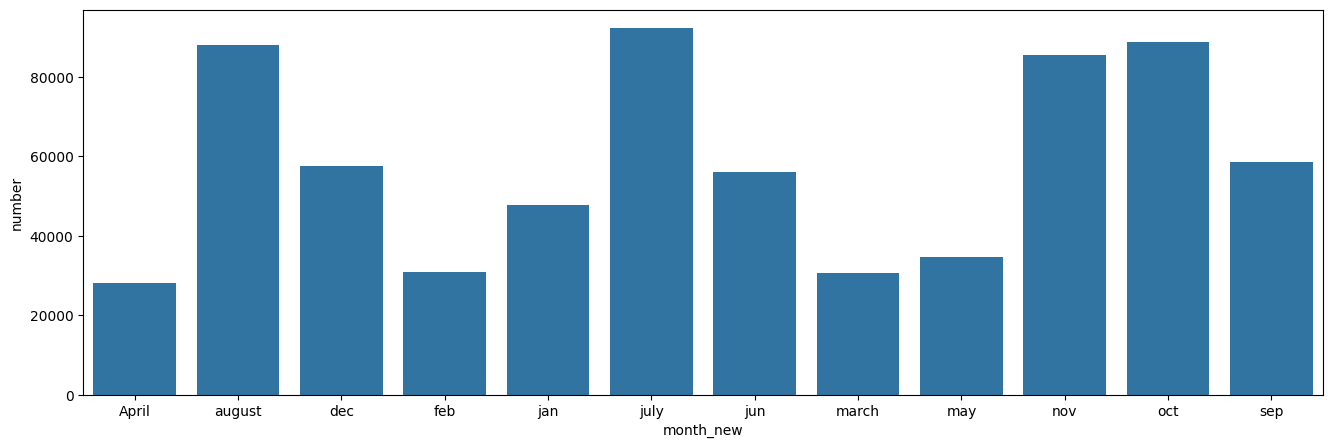

In [317]:
plt.figure(figsize=(16,5))
sns.barplot(x='month_new', y='number', data=data1)

#### in Which `Year` `Maximum` Number of `Forest` Were Reported?

In [318]:
data2 = data.groupby('year')['number'].sum().reset_index()
data2

,year,number
0,1998,20013.971
1,1999,26882.821
2,2000,27351.251
3,2001,29054.612
4,2002,37390.600
5,2003,42760.674
6,2004,38450.163
7,2005,35004.965
8,2006,33824.161
9,2007,33028.413


<Axes: xlabel='year', ylabel='number'>

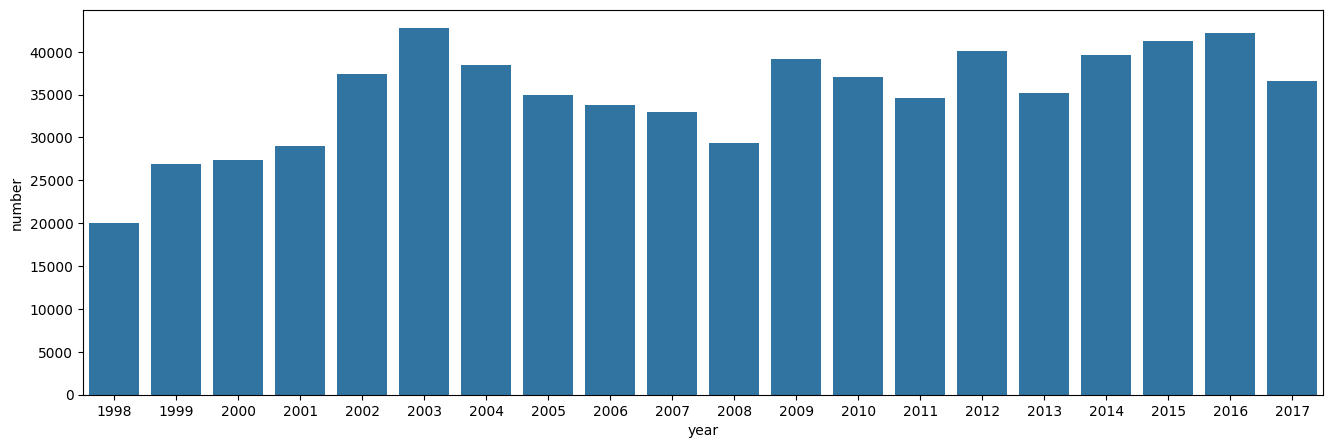

In [319]:
plt.figure(figsize=(16,5))
sns.barplot(x='year', y='number', data=data2)

#### in Which `State` `Maximum` Number of `Forest` Were Reported?

In [320]:
data3 = data.groupby('state')['number'].sum().reset_index()
data3

,state,number
0,Acre,18464.030
1,Alagoas,4606.000
2,Amapa,21831.576
3,Amazonas,30650.129
4,Bahia,44746.226
5,Ceara,30428.063
6,Distrito Federal,3561.000
7,Espirito Santo,6546.000
8,Goias,37695.520
9,Maranhao,25129.131


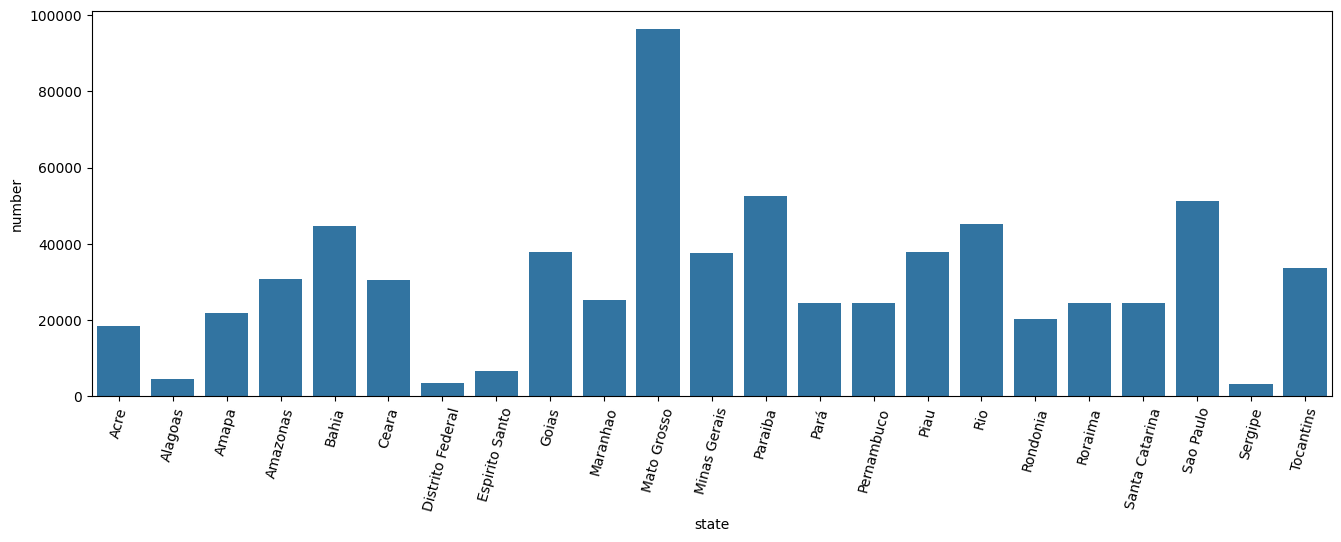

In [321]:
plt.figure(figsize=(16,5))
sns.barplot(x='state', y='number', data=data3)
plt.xticks(rotation=75)
plt.show()

#### Find Total Number of Fires Were Reported in `Amazons` `(year wise)`

In [322]:
data[data['state'] == 'Amazonas']['number'].sum()

30650.129

#### Display Number of Fires Were Reported in `Amazones (year wise)`

In [323]:
data4 = data[data['state'] == 'Amazonas']
data5 = data4.groupby('year')['number'].sum().reset_index()
data5

,year,number
0,1998,946.000
1,1999,1061.000
2,2000,853.000
3,2001,1297.000
4,2002,2852.000
5,2003,1524.268
6,2004,2298.207
7,2005,1657.128
8,2006,997.640
9,2007,589.601


<Axes: xlabel='year', ylabel='number'>

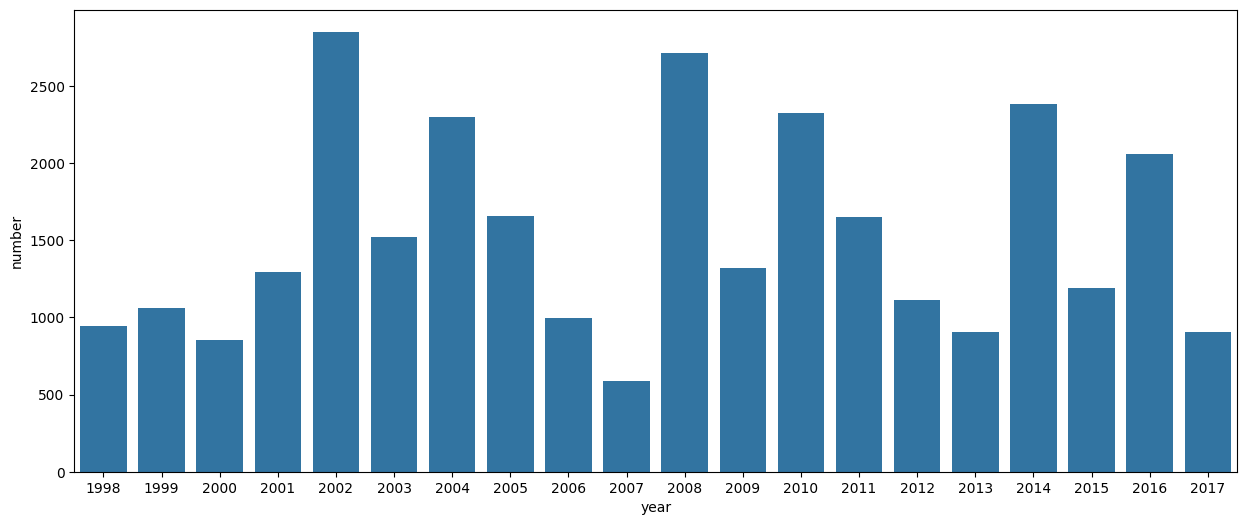

In [324]:
plt.figure(figsize=(15,6))
sns.barplot(x='year', y='number', data=data5)

#### Display Number of `Fires` Were Reported in `Amazonas (day wise)`

In [325]:
data6 = data[data['state'] == 'Amazonas']


In [337]:
daily_fires = data6.groupby('date')['number'].sum().reset_index()


C:\Users\Admin\AppData\Local\Temp\ipykernel_13332\3639335285.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data6['date'] = pd.to_datetime(data6['date'], format='%d-%m-%Y')
C:\Users\Admin\AppData\Local\Temp\ipykernel_13332\3639335285.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data6['day_of_week'] = data6['date'].dt.day_name()
C:\Users\Admin\AppData\Local\Temp\ipykernel_13332\3639335285.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.

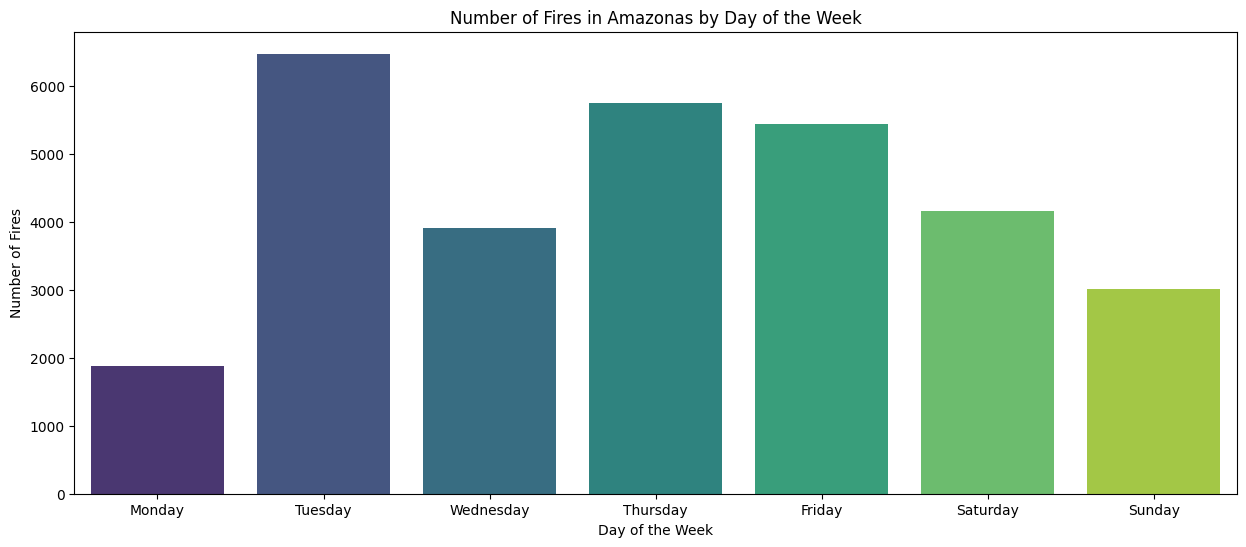

In [341]:

data6['date'] = pd.to_datetime(data6['date'], format='%d-%m-%Y')

data6['day_of_week'] = data6['date'].dt.day_name()

daily_fires = data6.groupby('day_of_week')['number'].sum().reset_index()

order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_fires['day_of_week'] = pd.Categorical(daily_fires['day_of_week'], categories=order, ordered=True)
daily_fires = daily_fires.sort_values('day_of_week')

plt.figure(figsize=(15, 6))
sns.barplot(x='day_of_week', y='number', data=daily_fires, palette='viridis')
plt.title('Number of Fires in Amazonas by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Fires')
plt.show()

#### Find Total Numbers Of Reported In `2015` And Visualize Data Based On `Each 'Month'`

In [345]:
fire = data[data['year']==2015].groupby('month_new')['number'].sum().reset_index()
fire

,month_new,number
0,April,2573.000
1,august,4363.125
2,dec,4088.522
3,feb,2309.000
4,jan,4635.000
5,july,4364.392
6,jun,3260.552
7,march,2202.000
8,may,2384.000
9,nov,4034.518


<Axes: xlabel='month_new', ylabel='number'>

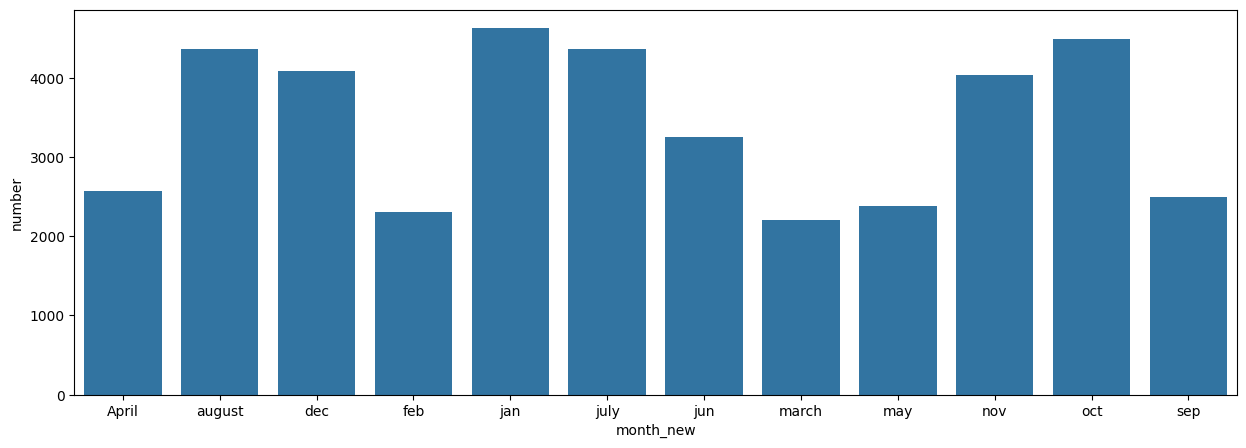

In [351]:
plt.figure(figsize=(15,5))
sns.barplot(x='month_new', y='number' ,data=fire)

#### Find `Average` Number Of Fires Were Reported From `Highest` To `Lowest` `(State-Wise)`

In [355]:
data7 = data.groupby('state')['number'].mean().sort_values(ascending=False).reset_index()
data7

,state,number
0,Sao Paulo,213.896226
1,Mato Grosso,203.479975
2,Bahia,187.222703
3,Piau,158.174674
4,Goias,157.721841
5,Minas Gerais,156.800243
6,Tocantins,141.037176
7,Amazonas,128.243218
8,Ceara,127.314071
9,Paraiba,111.073979


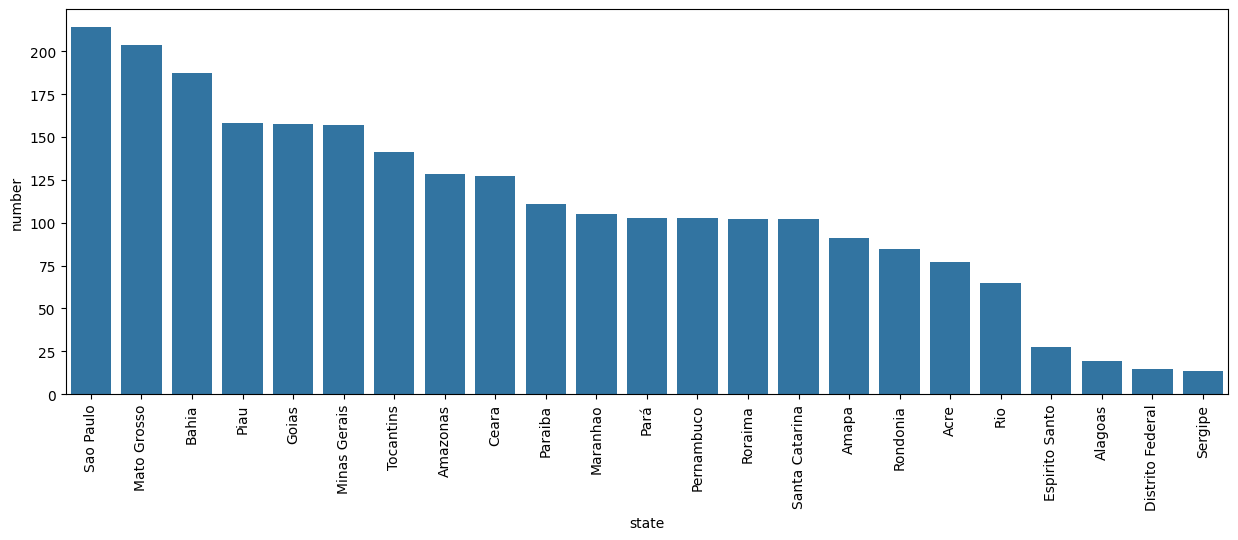

In [359]:
plt.figure(figsize=(15,5))
sns.barplot(x='state', y='number' ,data=data7)
plt.xticks(rotation = 90)
plt.show()

#### To Find The `State` Names Where Fires Were Reported in `'DEC'` `Month`

In [360]:
data[data['month_new']=='dec']['state'].unique()

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)